In [39]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '2017_jun_final.csv'
data = pd.read_csv(file_path)

Прочитайте отриману таблицю, використовуючи метод head

In [18]:
print(data.head())

   N                    Посада Мова програмування Спеціалізація   
0  1        Junior QA engineer                NaN     Manual QA  \
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці   
0                     0.5                              0.5  \
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії   
0                 400                             0  Харків        до 10 осіб  \
1                 430                           130  Харків  б

Визначте розмір таблиці за допомогою методу shape

In [19]:
print("Розмір таблиці:", data.shape)

Розмір таблиці: (8704, 25)


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [20]:
print("Типи стовпців:")
print(data.dtypes)

Типи стовпців:
N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary           

Порахуйте, яка частка пропусків міститься в кожній колонці

In [21]:
missing_percentages = (data.isnull().sum() / len(data)) * 100
print("Частка пропусків в кожному стовпці:")
print(missing_percentages)

Частка пропусків в кожному стовпці:
N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.00000

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [22]:
data_cleaned = data.dropna(subset=['Мова програмування'])

Знову порахуйте, яка частка пропусків міститься в кожній колонці

In [23]:
missing_percentages_cleaned = (data_cleaned.isnull().sum() / len(data_cleaned)) * 100
print("Частка пропусків після видалення стовпців з пропусками:")
print(missing_percentages_cleaned)

Частка пропусків після видалення стовпців з пропусками:
N                                    0.000000
Посада                               0.000000
Мова програмування                   0.000000
Спеціалізація                       99.979398
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.758962
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    0.618047
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                     

Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [24]:
data_cleaned_rows = data.dropna()

Визначте новий розмір таблиці за допомогою методу shape

In [25]:
print("Розмір таблиці після видалення рядків з пропусками:", data_cleaned_rows.shape)

Розмір таблиці після видалення рядків з пропусками: (0, 25)


Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [26]:
python_data = data[data['Мова програмування'] == 'Python']

Визначте розмір таблиці python_data за допомогою методу shape

In [27]:
print("Розмір таблиці python_data:", python_data.shape)

Розмір таблиці python_data: (207, 25)


Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [28]:
grouped_data = data.groupby('Посада')

Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg

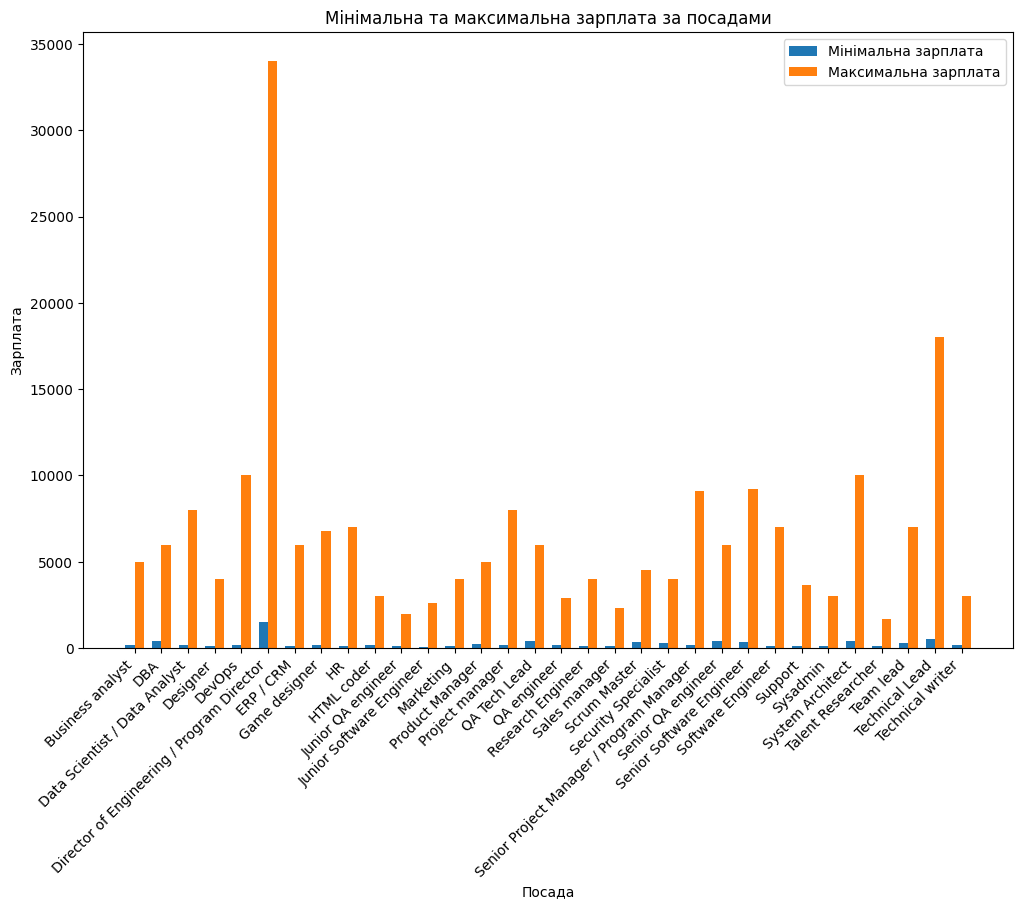

In [51]:
aggregated_data = grouped_data.agg({'Зарплата на місяць': ['min', 'max']})

fig, ax = plt.subplots(figsize=(12, 8))
positions = aggregated_data.index
min_salaries = aggregated_data[('Зарплата на місяць', 'min')]
max_salaries = aggregated_data[('Зарплата на місяць', 'max')]

bar_width = 0.35
index = range(len(positions))
bar1 = ax.bar(index, min_salaries, bar_width, label='Мінімальна зарплата')
bar2 = ax.bar([i + bar_width for i in index], max_salaries, bar_width, label='Максимальна зарплата')

ax.set_xlabel('Посада')
ax.set_ylabel('Зарплата')
ax.set_title('Мінімальна та максимальна зарплата за посадами')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(positions, rotation=45, ha='right')
ax.legend()

plt.show()

Виведіть результат агрегації

Агрегація зарплати за посадами:
                                           Зарплата на місяць       
                                                          min    max
Посада                                                              
Business analyst                                          200   5000
DBA                                                       380   6000
Data Scientist / Data Analyst                             150   8000
Designer                                                  100   4000
DevOps                                                    194  10000
Director of Engineering / Program Director               1500  34000
ERP / CRM                                                 100   6000
Game designer                                             150   6800
HR                                                        100   7000
HTML coder                                                154   3000
Junior QA engineer                                         96   2000
Ju

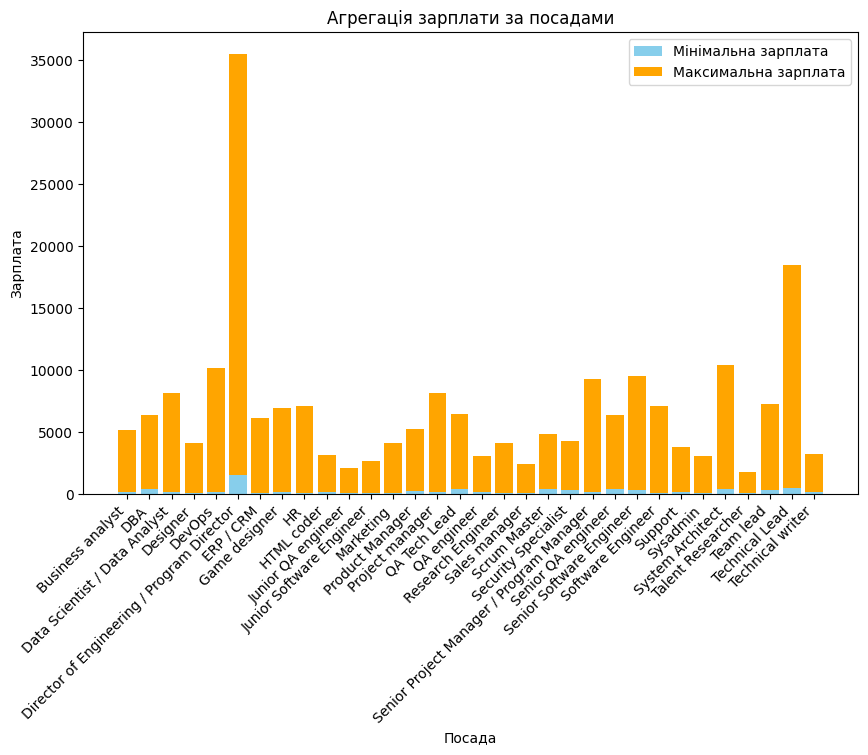

In [45]:
print("Агрегація зарплати за посадами:")
print(aggregated_data)

positions = aggregated_data.index
min_salaries = aggregated_data['Зарплата на місяць']['min']
max_salaries = aggregated_data['Зарплата на місяць']['max']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(positions, min_salaries, label='Мінімальна зарплата', color='skyblue')
ax.bar(positions, max_salaries, bottom=min_salaries, label='Максимальна зарплата', color='orange')
ax.set_xlabel('Посада')
ax.set_ylabel('Зарплата')
ax.set_title('Агрегація зарплати за посадами')
ax.legend()
plt.xticks(rotation=45, ha="right")
plt.show()

Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць

In [ ]:
def fill_avg_salary(salaries):
    return salaries.mean()

Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [ ]:
aggregated_data['avg'] = grouped_data['Зарплата на місяць'].apply(fill_avg_salary)

Створіть описову статистику за допомогою методу describe для нового стовпчика

Описова статистика для стовпчика 'Зарплата на місяць':
               min         max
count    32.000000     32.0000
mean    250.031250   6648.4375
std     258.096817   5957.2602
min      75.000000   1700.0000
25%     100.000000   3487.5000
50%     172.000000   5500.0000
75%     312.500000   7250.0000
max    1500.000000  34000.0000


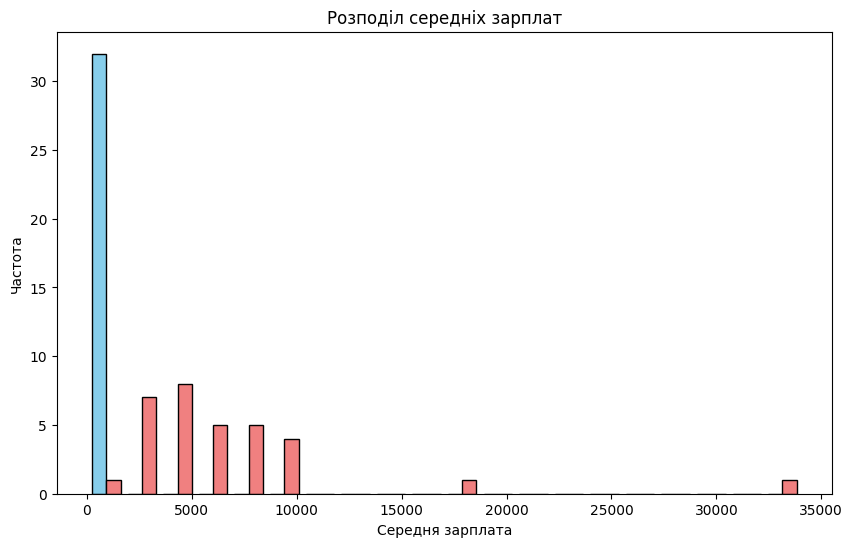

In [50]:
print("Описова статистика для стовпчика 'Зарплата на місяць':")
print(aggregated_data['Зарплата на місяць'].describe())

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(aggregated_data['Зарплата на місяць'], bins=20, color=['skyblue', 'lightcoral'], edgecolor='black')  # Adjust colors as needed
ax.set_xlabel('Середня зарплата')
ax.set_ylabel('Частота')
ax.set_title('Розподіл середніх зарплат')
plt.show()

Збережіть отриману таблицю в CSV файл

In [ ]:
aggregated_data.to_csv('analysed_data.csv', index=False)